<a href="https://colab.research.google.com/github/phannguyengiangan/Project_ML/blob/Project_Nh%C3%B3m-42/Project_ML_Nh%C3%B3m_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Thành viên nhóm:*** 
1. Nguyễn Thị Hoài Thu
2. Phan Nguyễn Gia Ngân

***Đường dẫn tập dữ liệu***: https://archive.ics.uci.edu/ml/datasets/Codon+usage

***YÊU CẦU PROJECT***

1. Mô tả dữ liệu, các thuộc tính
2. Vẽ các biểu đồ để thấy phân bố dữ liệu, các vấn đề của dữ liệu
3. Tiền xử lý dữ liệu (dữ liệu missing, feature selection, discretization, xử lý imbalanced data – nếu cần, …)
4. Lựa chọn thuật toán (ít nhất 4 thuật toán): Neural network, SVM, kNN, Naïve Bayes, RandomForest, Decision Tree
5. So sánh kết quả các thuật toán dựa trên các metrics:
Accuracy,
Precision,
Recall,
F1,
Vẽ biểu đồ

**Deadline: 23:59, 15/5/2023**

# Import libraries

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Task 1.Mô tả dữ liệu, các thuộc tính

Dữ liệu mô tả tần suất sử dụng codon trong DNA mã hóa bộ gen của một mẫu lớn các sinh vật đa dạng từ các đơn vị phân loại khác nhau được lập bảng trong cơ sở dữ liệu CUTG.

Các thuộc tính của tập dữ liệu:

Cột 1: Kingdom

Cột 2: DNAtype

Cột 3: SpeciesID

Cột 4: Ncodons

Cột 5: SpeciesName

Các cột 6-69: codon

- 'Kingdom' là một mã ba chữ cái tương ứng với 'xxx' trong tên cơ sở dữ liệu CUTG: 'arc' (archaea), 'bct' (bacteria), 'phg' (bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), và 'vrl' (virus).

- 'DNAtype' được biểu thị dưới dạng số nguyên cho thành phần di truyền học trong loài: 0-di truyền, 1-tế bào tâm bào, 2-tế bào khí quyển, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, và 12-kinetoplast.

- 'SpeciesID': Mã số định danh cho mỗi loài động vật.

- 'Ncodons': Tổng số codon trong gene được phân tích của mỗi loài động vật.

- 'SpeciesName' được đại diện bằng chuỗi đã được xóa bỏ dấu phẩy (và thay thế bằng khoảng trắng). Đây là nhãn miêu tả tên loài cho việc giải thích dữ liệu.

- Cuối cùng, tần suất sử dụng codon ('codon') bao gồm 'UUU', 'UUA', 'UUG', 'CUU', vv., được ghi nhận dưới dạng số thập phân (với số thập phân có 5 chữ số).

# Task 2.Vẽ các biểu đồ để thấy phân bố dữ liệu, các vấn đề của dữ liệu

In [ ]:
# code
dataset = pd.read_csv("codon_usage.csv")
dataset

<ipython-input-14-53437866b6af>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("codon_usage.csv")


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,NaN
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,NaN
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,NaN,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,NaN
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,NaN,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,NaN,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,NaN,NaN,NaN,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [ ]:
print(dataset.columns)

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')


Thăm dò dữ liệu

In [ ]:
# Thông tin sơ bộ của 69 đặc trưng
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          12947 non-null  object 
 6   UUC          13012 non-null  object 
 7   UUA          12568 non-null  float64
 8   UUG          12576 non-null  float64
 9   CUU          12993 non-null  float64
 10  CUC          12787 non-null  float64
 11  CUA          12753 non-null  float64
 12  CUG          12805 non-null  float64
 13  AUU          12977 non-null  float64
 14  AUC          13013 non-null  float64
 15  AUA          12739 non-null  float64
 16  AUG          13015 non-null  float64
 17  GUU          12922 non-null  float64
 18  GUC          12934 non-null  float64
 19  GUA 

Bộ dữ liệu gồm 13028 mẫu, 69 đặc trưng

Trong đó, có 65 đặc trưng liên tục (kiểu dữ liệu float64, int64) và 4 đặc trưng đối tượng khác (kiểu object)

Tất cả các đặc trưng đều non-null

***Biểu đồ thể hiện sự phân bổ của kiểu dữ liệu***

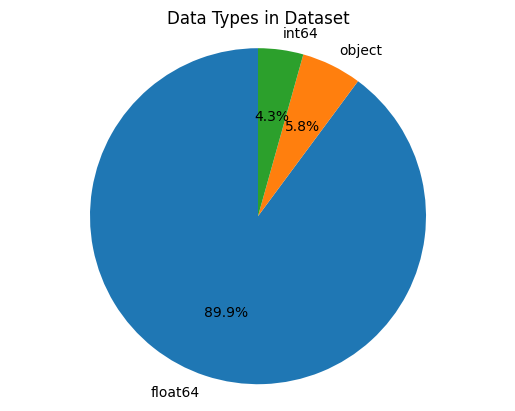

In [ ]:
# Tính toán số lượng cột theo kiểu dữ liệu
dtype_counts = dataset.dtypes.value_counts()

# Tạo biểu đồ tròn thể hiện tỉ lệ các kiểu dữ liệu
plt.pie(dtype_counts, labels=dtype_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Data Types in Dataset')
plt.show()

In [ ]:
# Lấy ra danh sách tên các đặc trưng định lượng và định tính
numerical = dataset.iloc[:, :-1].select_dtypes(include=np.number).columns.tolist()
categorical = dataset.iloc[:, :-1].select_dtypes(bool).columns.tolist()

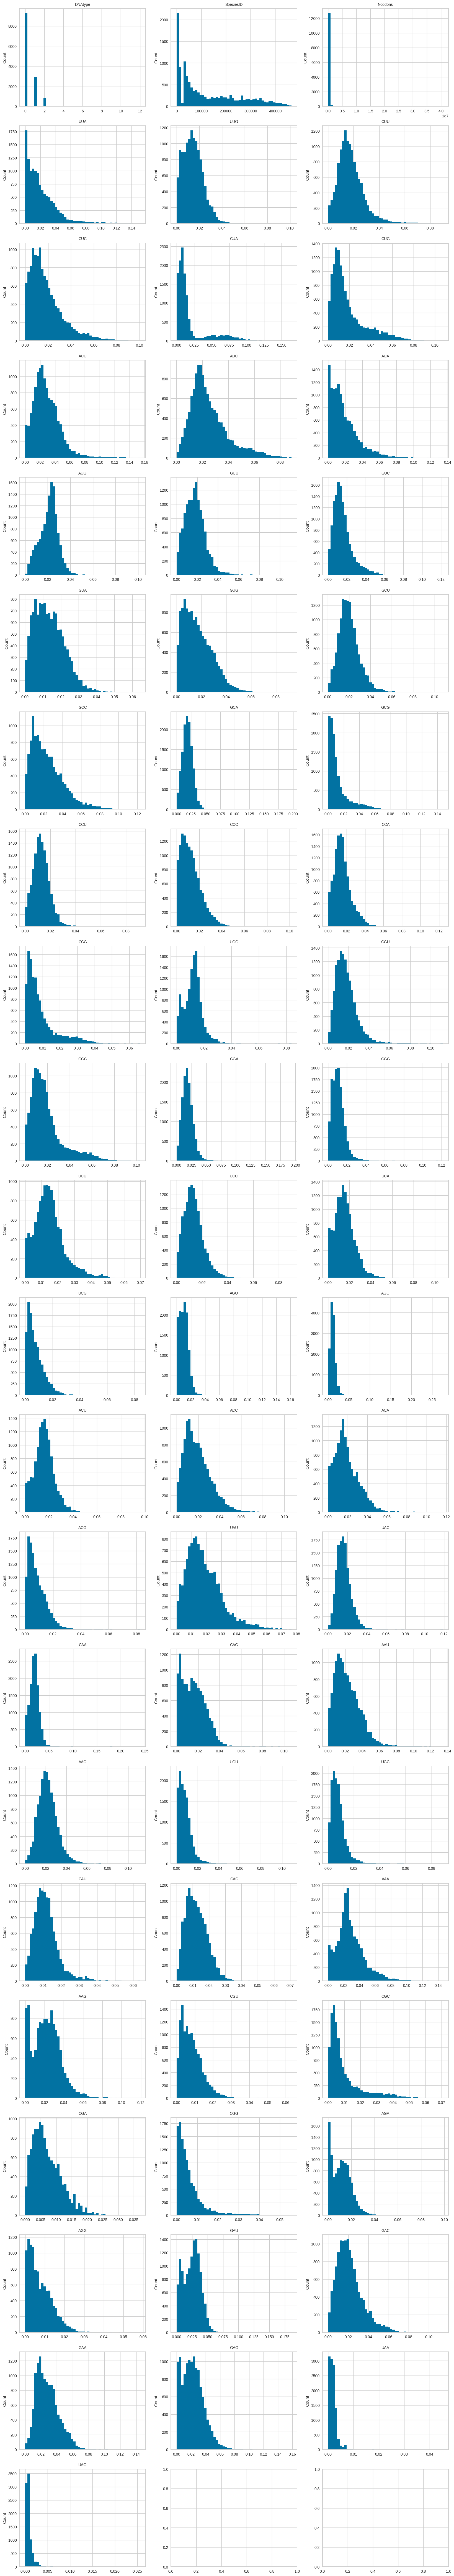

In [ ]:
# Biểu đồ histogram của 69 đặc trưng định lượng
fig, axs = plt.subplots(22, 3, figsize=(20,120))

for ax, feature in zip(axs.flat, numerical):
    ax.hist(dataset[feature], bins=50)
    ax.set_title(feature, fontsize=10, pad=8)
    ax.set(ylabel = 'Count')

In [ ]:
dataset = dataset.replace('?', np.NAN)

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

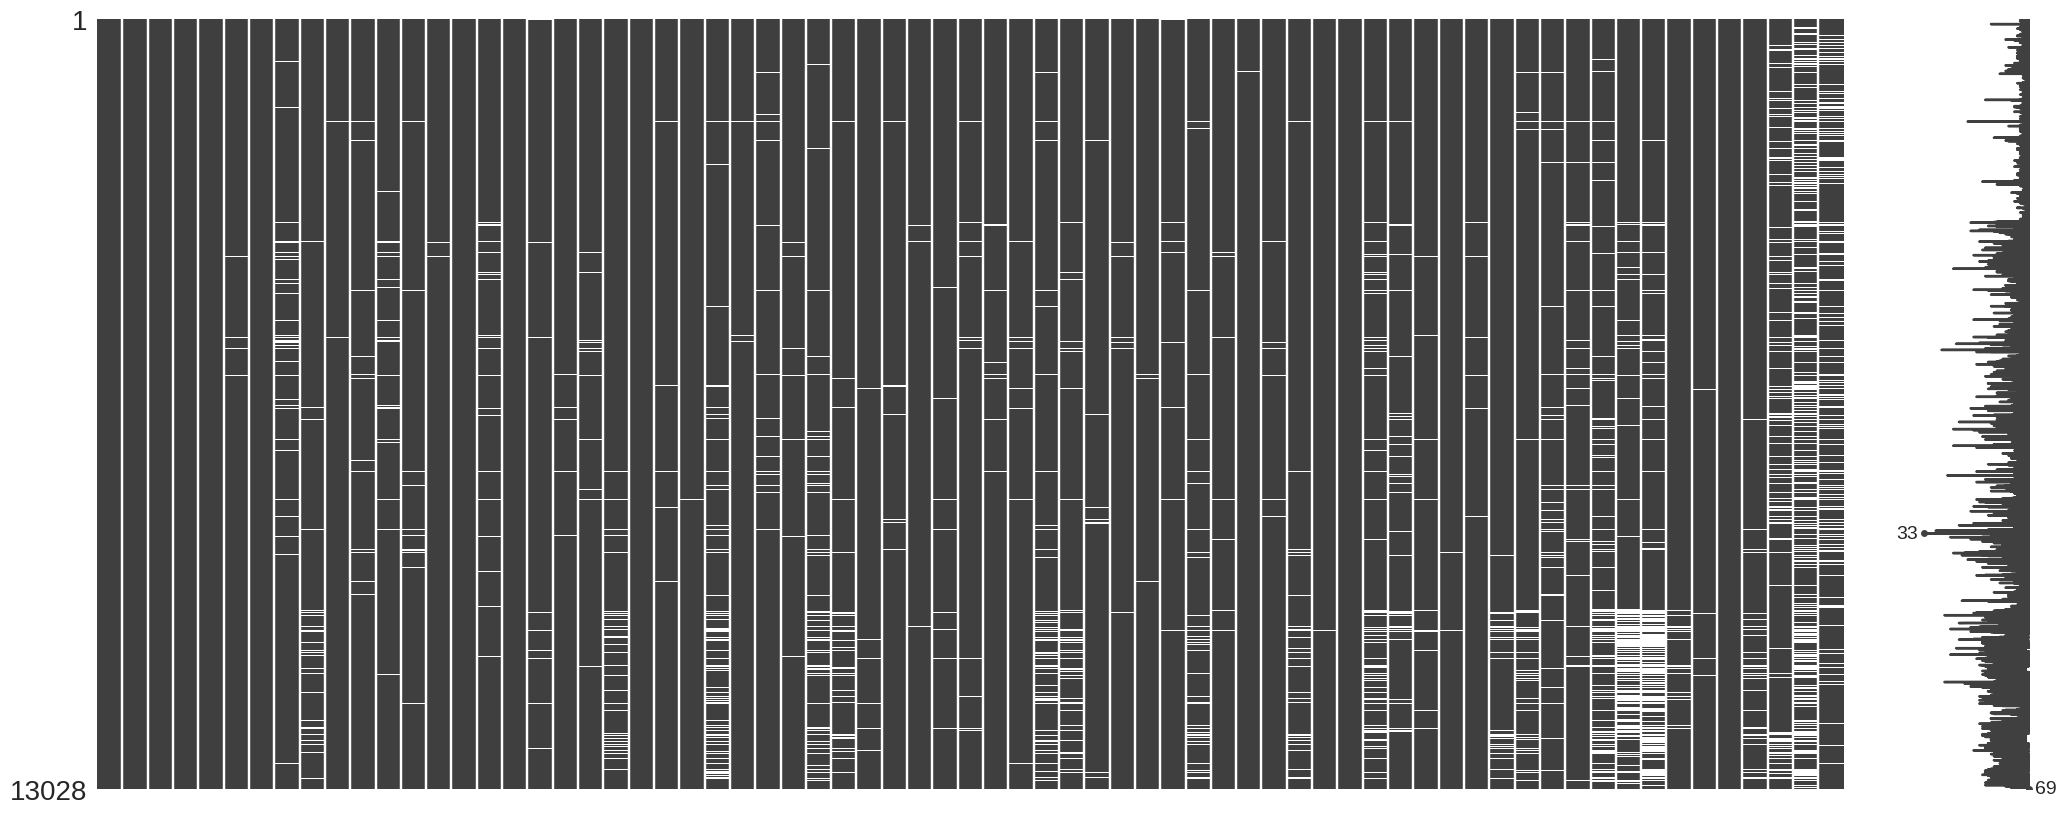

In [ ]:
#biểu đồ biểu thị các giá trị NaN cho tất cả các cột
import missingno as msno

msno.matrix(dataset)

Các cột có vạch trắng thể hiện cho việc mất giá trị khi nhập khá nhiều, cột càng nhiều vạch dữ liệu của cột bị mất đó càng lớn

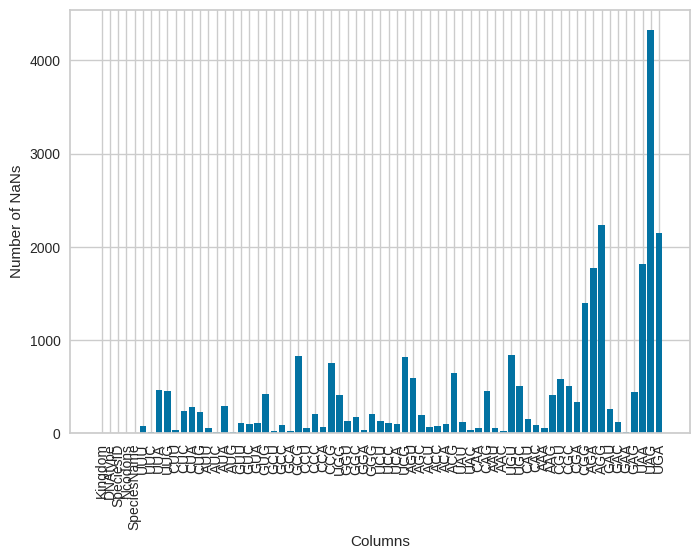

In [ ]:
#biểu đồ biểu thị các giá trị NaN cho tất cả các cột (dạng khác)
nan_counts = dataset.isna().sum()
plt.bar(nan_counts.index, nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of NaNs")
plt.show()

<ipython-input-76-7fb6beb8f17a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([col], rotation=90)


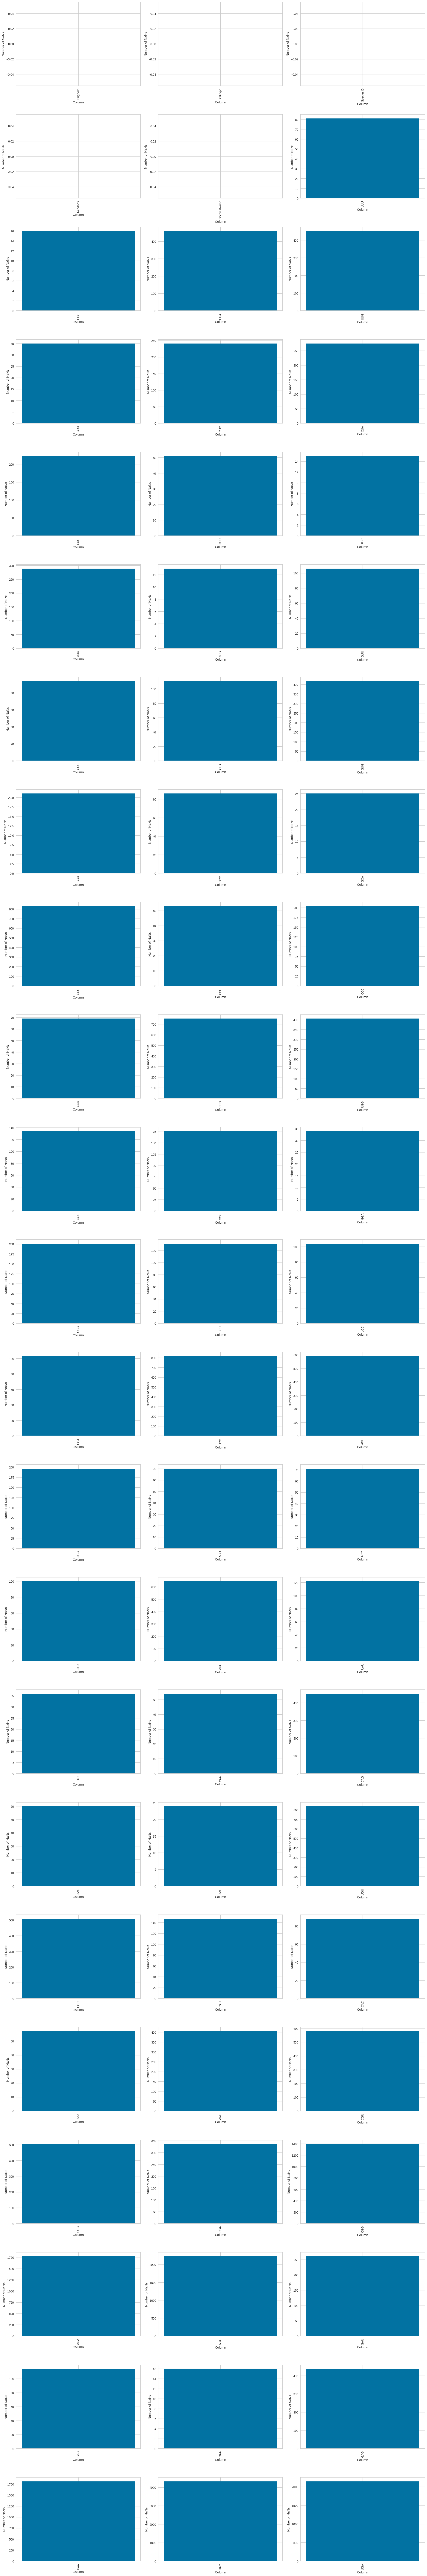

In [ ]:
#biểu đồ biểu thị các giá trị NaN cho từng cột

fig, axes = plt.subplots(23, 3, figsize=(20,120))
axes = axes.flatten()

for i, col in enumerate(dataset.columns):
    nan_counts = dataset[col].isna().sum()
    ax = axes[i]
    ax.bar(col, nan_counts)
    ax.set_xticklabels([col], rotation=90)
    ax.set_xlabel("Column")
    ax.set_ylabel("Number of NaNs")
    
plt.tight_layout()
plt.savefig("nan_counts.png")
plt.show()

Kiểm tra kiểu dữ liệu 

<ipython-input-53-df25fd66954d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(dataset.columns, fontsize=10)


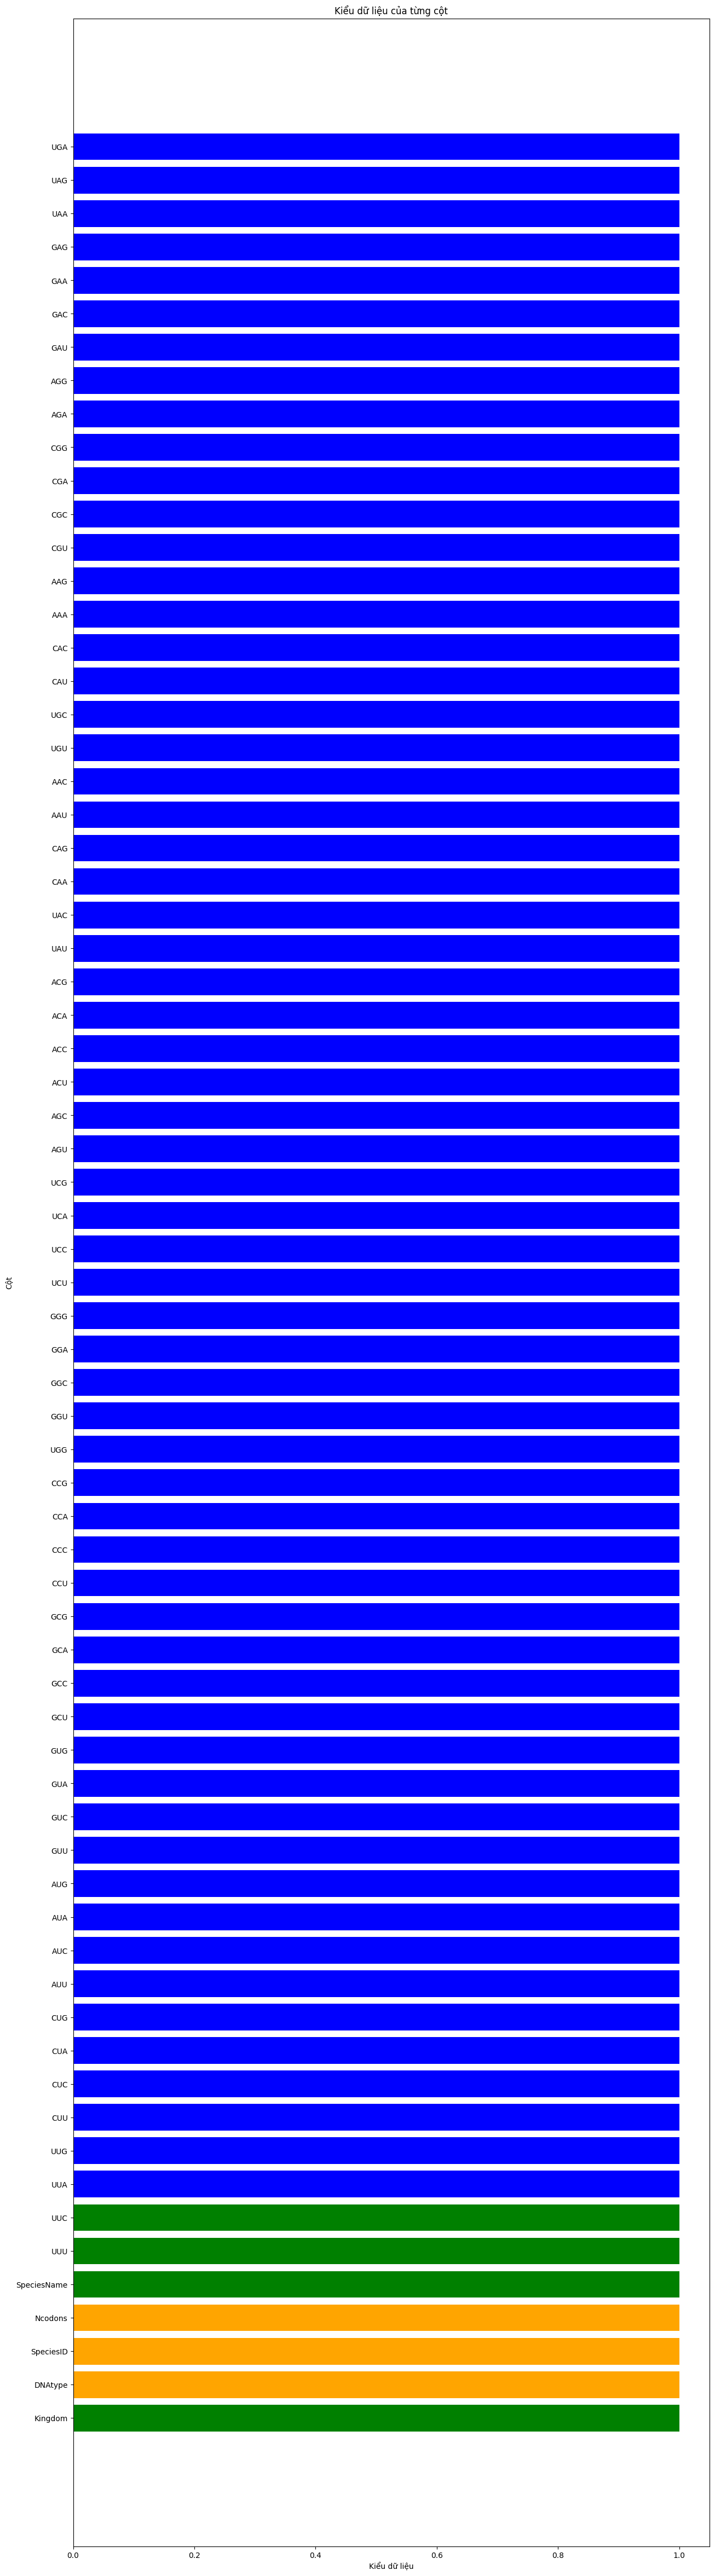

In [ ]:
# Tạo figure và axes
fig, ax = plt.subplots(figsize=(15,60))

# Vẽ biểu đồ
for i, dtype in enumerate(dataset.dtypes):
    color = 'blue' if dtype == 'float' else ('orange' if dtype == 'int' else 'green')
    ax.barh(dataset.columns[i], 1, color=color)

# Đặt tên cho trục và tiêu đề
ax.set_xlabel('Kiểu dữ liệu')
ax.set_ylabel('Cột')
ax.set_title('Kiểu dữ liệu của từng cột')

# Đặt tick label cho trục y
ax.set_yticklabels(dataset.columns, fontsize=10)

# Hiển thị biểu đồ
plt.show()

có một vấn đề ở đây, UUU và UUC đáng lẽ nó sẽ cùng kiểu dữ liệu của các tập phía sau nhưng ở đây nó lại là object

PHÂN BỐ DỮ LIỆN THEO KINGDOM

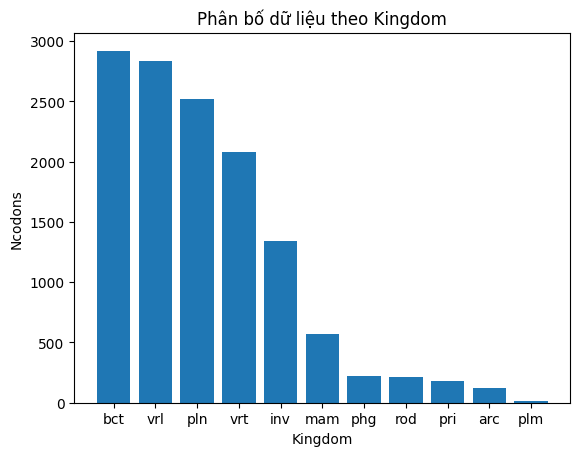

In [ ]:
# Lấy cột "Kingdom" để thống kê số lượng giá trị của từng nhóm
kingdom_counts = dataset['Kingdom'].value_counts()

# Vẽ biểu đồ cột để thấy phân bố dữ liệu
fig, ax = plt.subplots()
ax.bar(kingdom_counts.index, kingdom_counts.values)
ax.set_xlabel('Kingdom')
ax.set_ylabel('Ncodons')
ax.set_title('Phân bố dữ liệu theo Kingdom')
plt.show()

# Task 3.Tiền xử lý dữ liệu (dữ liệu missing, feature selection, discretization, xử lý imbalanced data – nếu cần, …)

Sơ chế dữ liệu:
(vì dữ liệu lớn nên không lo bị ít dữ liệu)

In [ ]:
# xóa tất cả các hàng có NaN
dataset.dropna(inplace=True)
# lưu DataFrame đã được xử lý
dataset.to_csv('codon_usage.csv', index=False)

In [ ]:
# Xóa các cột chỉ chứa 1 giá trị
dataset.drop(columns=dataset.columns[dataset.nunique()==1], inplace=True)

# Xóa các hàng trùng lặp
dataset.drop_duplicates(inplace=True)
# lưu DataFrame đã được xử lý
dataset.to_csv('codon_usage.csv', index=False)

In [ ]:
#đổi kiểu dữ liệu của cột UUU và UUC về đúng dữ liệu
dataset['UUU'] = dataset['UUU'].astype(float)
dataset['UUC'] = dataset['UUC'].astype(float)
# lưu DataFrame đã được xử lý
dataset.to_csv('codon_usage.csv', index=False)

In [ ]:
#Xóa các hàng có giá trị ngoại lai:
from scipy import stats

# tính toán Z-score cho các cột số
num_cols = dataset.select_dtypes(include=['float', 'int']).columns
z_scores = stats.zscore(dataset[num_cols])

# lọc các hàng có giá trị Z-score ngoài khoảng [-3, 3]
filtered_rows = (abs(z_scores) < 3).all(axis=1)
filtered_dataset = dataset[filtered_rows]
# lưu DataFrame đã được xử lý
dataset.to_csv('codon_usage.csv', index=False)

In [ ]:
#xóa các hàng có ký tự 00E
# tìm kiếm các giá trị chứa chuỗi "00E"
mask = dataset.astype(str).apply(lambda x: x.str.contains('00E')).any(axis=1)

# xóa các dòng có giá trị chứa chuỗi "00E"
df = dataset[~mask]

# lưu DataFrame đã được xử lý
df.to_csv('codon_usage.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('codon_usage.csv')

# Khởi tạo Label Encoder
le = LabelEncoder()

# Chuyển đổi cột Kingdom, SpeciesName sang dạng số
df['Kingdom'] = le.fit_transform(df['Kingdom'])
df['SpeciesName'] = le.fit_transform(df['SpeciesName'])

# khởi tạo StandardScaler
scaler = StandardScaler()

# chuẩn hóa dữ liệu các cột ngoại trừ cột Kingdom
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

# Tách dữ liệu thành input X và output y
X = df.drop('Kingdom', axis=1)
y = df['Kingdom']

# Chia tập dữ liệu thành tập train (70%) và tập test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Task 4.Lựa chọn thuật toán (ít nhất 4 thuật toán): Neural network, SVM, kNN, Naïve Bayes, RandomForest, Decision Tree

In [ ]:
accuracy = []
precision = []
recall = []
f1 = []
nameModel = []

***Neural network***



In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

def create_model():
  neural_model = Sequential()
  nameModel.append(type(neural_model).__name__)
  # Lớp Dense đầu tiên có 64 node với hàm kích hoạt 'relu' và sử dụng L2 regularization giúp giảm thiểu overfitting trong mô hình
  neural_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
  # Lớp Dropout với giá trị 0.2 để giảm overfitting trong mô hình
  neural_model.add(Dropout(0.2))
  # Lớp Dense thứ hai có 32 node với hàm kích hoạt 'relu' và sử dụng L2 regularization giúp giảm thiểu overfitting trong mô hình
  neural_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
  # Lớp Dropout với giá trị 0.2 để giảm overfitting trong mô hình
  neural_model.add(Dropout(0.2))
  # Lớp Dense thứ ba có 16 node với hàm kích hoạt 'relu' và sử dụng L2 regularization giúp giảm thiểu overfitting trong mô hình
  neural_model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
  # Lớp Dropout với giá trị 0.2 để giảm overfitting trong mô hình
  neural_model.add(Dropout(0.2))
  # lớp Dense cuối cùng có 1 node với hàm kích hoạt 'sigmoid' để phân loại thành hai lớp 0 và 1
  neural_model.add(Dense(1, activation='sigmoid'))
  # Compile mô hình
  neural_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  # Train mô hình
  neural_model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)
  return neural_model

model = KerasClassifier(build_fn=create_model)

# Tạo dictionary chứa các tham số cần tìm kiếm
param_grid = {'optimizer': ['Adam', 'SGD', 'RMSprop'],
              'epochs': [30, 60, 80],
              'batch_size': [32, 64, 128]
              }

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True)

# Train mô hình với GridSearchCV
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
31/31 [==============================] - 1s 4ms/step - loss: -10.0395 - accuracy: 0.3061
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: -69.9308 - accuracy: 0.3138
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: -340.0362 - accuracy: 0.3138
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: -1297.3926 - accuracy: 0.3138
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: -3922.5974 - accuracy: 0.3138
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: -9715.5312 - accuracy: 0.3138
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: -21118.3516 - accuracy: 0.3138
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: -40668.7734 - accuracy: 0.3138
Epoch 9/50
31/31 [==============================] - 0s 4ms/step - loss: -71970.7656 - accuracy: 0.3138
Epoch 10/50
31/31 [==============================] - 0s 3ms/step - loss: -116940.562

GridSearchCV(estimator=KerasClassifier(build_fn=<function create_model at 0x7faa26d9c820>),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128], 'epochs': [30, 60, 80],
                         'optimizer': ['Adam', 'SGD', 'RMSprop']})

In [ ]:
# Dự đoán kết quả trên tập test
import numpy as np

# Dự đoán kết quả trên tập test
y_pred = grid_search.predict(X_test)
y_pred_neural = np.round(y_pred)

accuracy_neural = accuracy_score(y_pred_neural, y_test)
accuracy.append(accuracy_neural)

precision_neural = precision_score(y_pred_neural, y_test, average='macro')
precision.append(precision_neural)

recall_neural = recall_score(y_pred_neural, y_test, average='macro', zero_division=0)
recall.append(recall_neural)

f1_neural = f1_score(y_pred_neural, y_test, average='macro')
f1.append(f1_neural)

print('Accuracy: ', accuracy_neural)
print('Precision: ', precision_neural)
print('Recall: ', recall_neural)
print('F1: ', f1_neural)

53/53 [==============================] - 0s 2ms/step
Accuracy:  0.014397120575884824
Precision:  0.09090909090909091
Recall:  0.0013088291432622567
F1:  0.002580506424385786


***SVM***

In [ ]:
# svm
from sklearn import svm

# Khởi tạo mô hình 
svm_model = svm.SVC(kernel='linear')

nameModel.append(type(svm_model).__name__)

# Huấn luyện mô hình trên tập train
svm_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_pred_svm, y_test)
accuracy.append(accuracy_svm)

precision_svm = precision_score(y_pred_svm, y_test, average='macro')
precision.append(precision_svm)

recall_svm = recall_score(y_pred_svm, y_test, average='macro', zero_division=0)
recall.append(recall_svm)

f1_svm = f1_score(y_pred_svm, y_test, average='macro')
f1.append(f1_svm)

print('Accuracy: ', accuracy_svm)
print('Precision: ', precision_svm)
print('Recall: ', recall_svm)
print('F1: ', f1_svm)

Accuracy:  0.9040191961607679
Precision:  0.7160766444569211
Recall:  0.7311649830702757
F1:  0.716785956547972


***kNN***

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Kiểm định chéo (cross-validation) với các giá trị n_neighbors từ 1 đến 10
scores = []
for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append((n, cv_scores.mean()))

# In ra kết quả kiểm định chéo
for n, score in scores:
    print(f"n_neighbors = {n}, mean accuracy = {score}")

# Chọn số lượng n_neighbors gần nhất tốt nhất dựa trên kết quả kiểm định chéo
best_n_neighbors = max(scores, key=lambda x: x[1])[0]
print(f"\nBest n_neighbors: {best_n_neighbors}")

n_neighbors = 1, mean accuracy = 0.9138420462327916
n_neighbors = 2, mean accuracy = 0.8870922703827588
n_neighbors = 3, mean accuracy = 0.8991761868368553
n_neighbors = 4, mean accuracy = 0.8922336585575661
n_neighbors = 5, mean accuracy = 0.8873476855481996
n_neighbors = 6, mean accuracy = 0.8842605367026961
n_neighbors = 7, mean accuracy = 0.8786033554671088
n_neighbors = 8, mean accuracy = 0.8752588063642047
n_neighbors = 9, mean accuracy = 0.8726861271848418
n_neighbors = 10, mean accuracy = 0.8652287983907521

Best n_neighbors: 1


In [ ]:
# knn
# Khởi tạo mô hình
knn_model = KNeighborsClassifier(best_n_neighbors)

nameModel.append(type(knn_model).__name__)

# Huấn luyện mô hình trên tập train
knn_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_pred_knn, y_test)
accuracy.append(accuracy_knn)

precision_knn = precision_score(y_pred_knn, y_test, average='macro')
precision.append(precision_knn)

recall_knn = recall_score(y_pred_knn, y_test, average='macro', zero_division=0)
recall.append(recall_knn)

f1_knn = f1_score(y_pred_knn, y_test, average='macro')
f1.append(f1_knn)

print('Accuracy: ', accuracy_knn)
print('Precision: ', precision_knn)
print('Recall: ', recall_knn)
print('F1: ', f1_knn)

Accuracy:  0.9238152369526095
Precision:  0.7613972910722737
Recall:  0.7503439767828709
F1:  0.7518291140965823


***Naïve Bayes***

In [ ]:
# naïve bayes
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình
nb_model = GaussianNB()

nameModel.append(type(nb_model).__name__)

# Huấn luyện mô hình trên tập train
nb_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_pred_nb, y_test)
accuracy.append(accuracy_nb)

precision_nb = precision_score(y_pred_nb, y_test, average='macro')
precision.append(precision_nb)

recall_nb = recall_score(y_pred_nb, y_test, average='macro', zero_division=0)
recall.append(recall_nb)

f1_nb = f1_score(y_pred_nb, y_test, average='macro')
f1.append(f1_nb)

print('Accuracy: ', accuracy_nb)
print('Precision: ', precision_nb)
print('Recall: ', recall_nb)
print('F1: ', f1_nb)

Accuracy:  0.5206958608278345
Precision:  0.48360289194537887
Recall:  0.4180314327885235
F1:  0.35079456017587485


***Random Forest***

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình
rf_model = RandomForestClassifier(n_estimators=100)

nameModel.append(type(rf_model).__name__)

# Huấn luyện mô hình trên tập train
rf_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_pred_rf, y_test)
accuracy.append(accuracy_rf)

precision_rf = precision_score(y_pred_rf, y_test, average='macro')
precision.append(precision_rf)

recall_rf = recall_score(y_pred_rf, y_test, average='macro', zero_division=0)
recall.append(recall_rf)

f1_rf = f1_score(y_pred_rf, y_test, average='macro')
f1.append(f1_rf)

print('Accuracy: ', accuracy_rf)
print('Precision: ', precision_rf)
print('Recall: ', recall_rf)
print('F1: ', f1_rf)

Accuracy:  0.907618476304739
Precision:  0.6327382564420433
Recall:  0.7764319651348639
F1:  0.6699514457671649


***Decision Tree***

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình
tree_model = DecisionTreeClassifier()

nameModel.append(type(tree_model).__name__)

# Huấn luyện mô hình trên tập train
tree_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_pred_tree, y_test)
accuracy.append(accuracy_tree)

precision_tree = precision_score(y_pred_tree, y_test, average='macro')
precision.append(precision_tree)

recall_tree = recall_score(y_pred_tree, y_test, average='macro', zero_division=0)
recall.append(recall_tree)

f1_tree = f1_score(y_pred_tree, y_test, average='macro')
f1.append(f1_tree)

print('Accuracy: ', accuracy_tree)
print('Precision: ', precision_tree)
print('Recall: ', recall_tree)
print('F1: ', f1_tree)

Accuracy:  0.7978404319136173
Precision:  0.6280818785469141
Recall:  0.6011080864352655
F1:  0.6113089442970743


# Task 5.So sánh kết quả các thuật toán dựa trên các metrics: Accuracy, Precision, Recall, F1, Vẽ biểu đồ

In [ ]:
# Bảng kết quả Accuracy, Precision, Recall, F1 giữa các thuật toán
from prettytable import PrettyTable

# Khởi tạo bảng
tb = PrettyTable(['Thuật toán', 'Accuracy','Precision','Recall','F1'])

# Thêm dòng vào bảng
tb.add_row(['Neural Network',accuracy_neural, precision_neural, recall_neural, f1_neural])
tb.add_row(['SVM', accuracy_svm, precision_svm, recall_svm, f1_svm])
tb.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
tb.add_row(['Naïve Bayes', accuracy_nb, precision_nb, recall_nb, f1_nb])
tb.add_row(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])
tb.add_row(['Decision Tree', accuracy_tree, precision_tree, recall_tree, f1_tree])

print(tb)

+----------------+----------------------+---------------------+-----------------------+----------------------+
|   Thuật toán   |       Accuracy       |      Precision      |         Recall        |          F1          |
+----------------+----------------------+---------------------+-----------------------+----------------------+
| Neural Network | 0.014397120575884824 | 0.09090909090909091 | 0.0013088291432622567 | 0.002580506424385786 |
|      SVM       |  0.9040191961607679  |  0.7160766444569211 |   0.7311649830702757  |  0.716785956547972   |
|      kNN       |  0.9238152369526095  |  0.7613972910722737 |   0.7503439767828709  |  0.7518291140965823  |
|  Naïve Bayes   |  0.5206958608278345  | 0.48360289194537887 |   0.4180314327885235  | 0.35079456017587485  |
| Random Forest  |  0.907618476304739   |  0.6327382564420433 |   0.7764319651348639  |  0.6699514457671649  |
| Decision Tree  |  0.7978404319136173  |  0.6280818785469141 |   0.6011080864352655  |  0.6113089442970743  |
+

Dựa vào kết quả của Accuracy, Precision, Recall và F1 thì thuật toán tốt nhất cho bài toán này là SVM hoặc kNN. Neural Network và Naïve Bayes cho kết quả < 50% có thể do tập dữ liệu codon_usage.csv không phù hợp với hai loại mô hình này vì Neural Network thường được ứng dụng phổ biến trong những bài toán nhận dạng object trong ảnh, còn Naïve Bayes thường được sử dụng trong các bài toán phân loại văn bản (Text Classification).

***Vẽ Biểu Đồ***

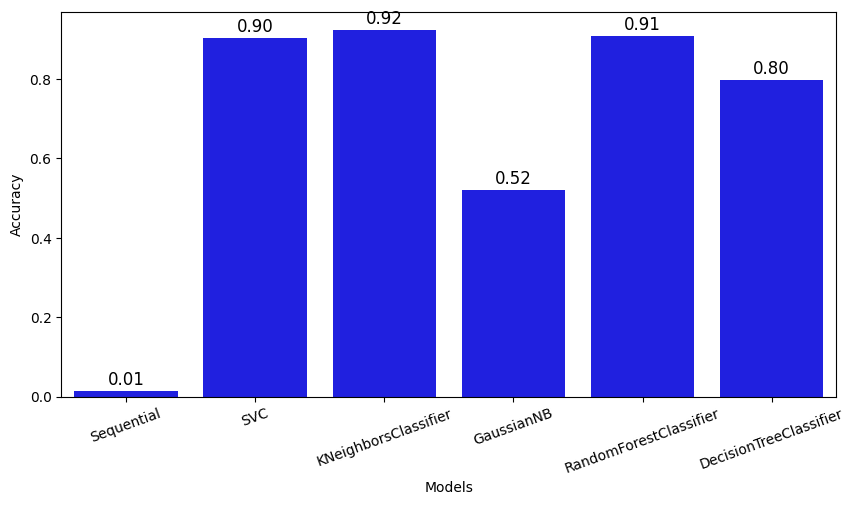

In [ ]:
# accuracy
import seaborn as sns
import matplotlib.pyplot as plt

model_Name = pd.Series(nameModel, name='Model').astype(str)
acc_score = pd.Series(accuracy, name='Accuracy')
output = pd.concat([model_Name, acc_score],axis=1)

plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output, color='blue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

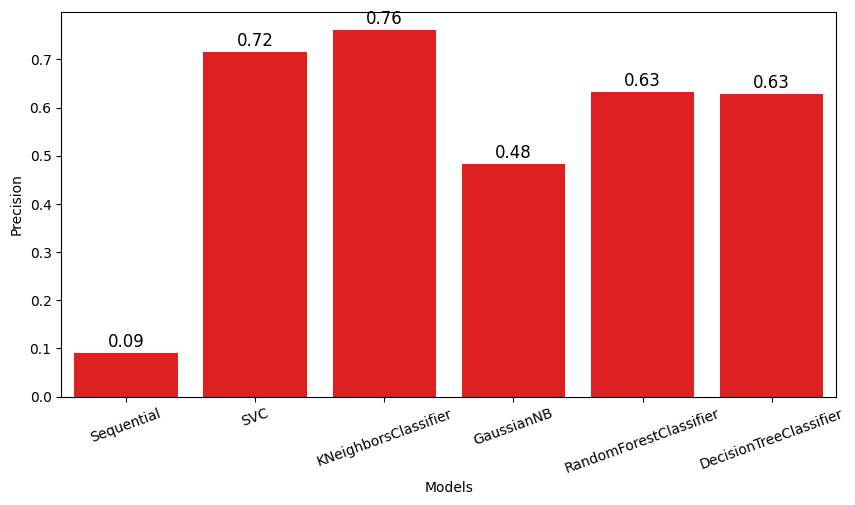

In [ ]:
# precision
model_Name = pd.Series(nameModel, name='Model').astype(str)
pre_score = pd.Series(precision, name='Precision')
output = pd.concat([model_Name, pre_score],axis=1)

plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Precision', data=output, color='red')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Precision")
plt.xticks(rotation=20);

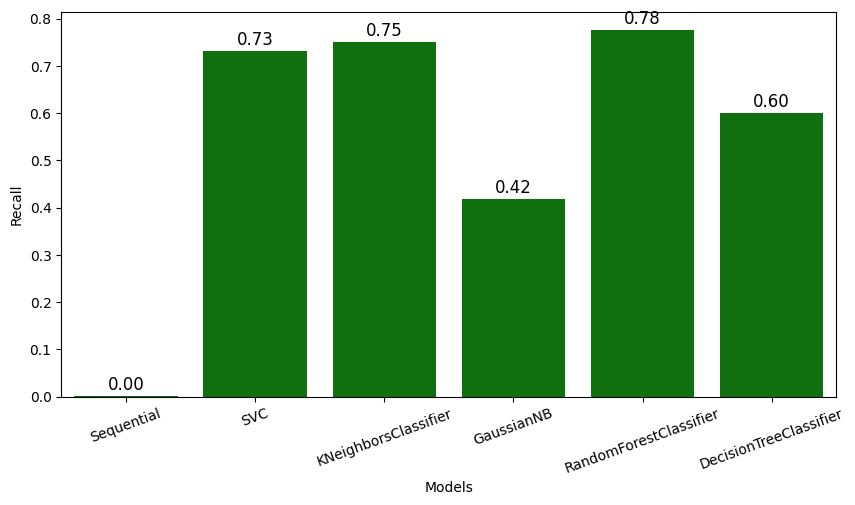

In [ ]:
# recall
model_Name = pd.Series(nameModel, name='Model').astype(str)
re_score = pd.Series(recall, name='Recall')
output = pd.concat([model_Name, re_score],axis=1)

plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Recall', data=output, color='green')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Recall")
plt.xticks(rotation=20);

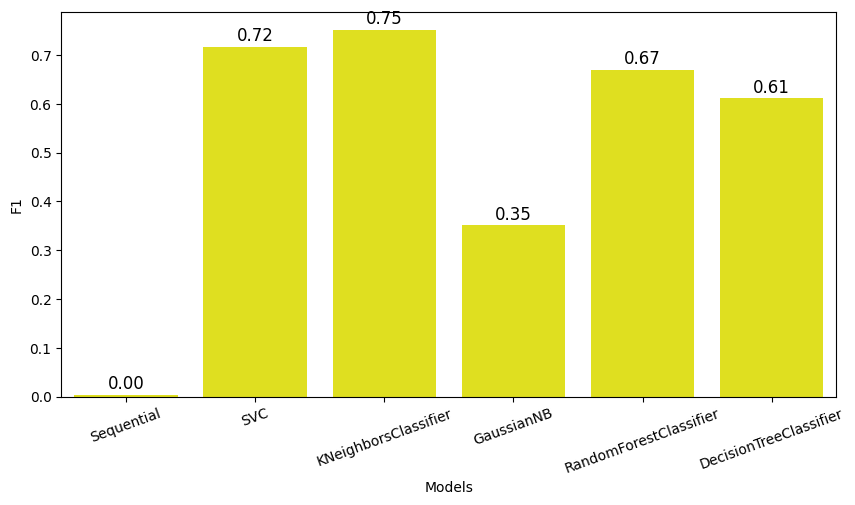

In [ ]:
# f1
model_Name = pd.Series(nameModel, name='Model').astype(str)
f1_score = pd.Series(f1, name='F1')
output = pd.concat([model_Name, f1_score],axis=1)

plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='F1', data=output, color='yellow')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("F1")
plt.xticks(rotation=20);

# Finally,

Save a copy in your Github. Remember renaming the notebook.